<a href="https://colab.research.google.com/github/hurtado1820/RegresionLogistica/blob/main/small_dataset_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística usando Scikit Learn

## Importar nuestras librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar y explorar nuestro set de datos

In [ ]:
#Carga de un dataset de scikit learn
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
#1797 imagenes con tamaño 8*8 pixeles
digits.data.shape

(1797, 64)

In [ ]:
#Una imagen 
digit_sample = digits.data[0]
digit_sample

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Al ser un problema de aprendizaje supervisado contamos con datos ya etiquetados a los que queremos llegar como resultado.

In [ ]:
#Etiquetas de imagenes
digits.target.shape

(1797,)

In [ ]:
digits.target[0]

0

## Graficando nuestra imagen

In [ ]:
#Organizar imagen como cuadricula 8*8
digit_reshaped = digit_sample.reshape(8,8)
digit_reshaped

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

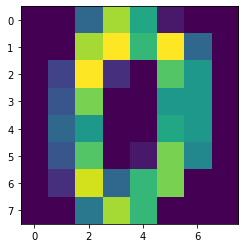

In [ ]:
plt.imshow(digit_reshaped)

## Graficando varias imagenes

In [ ]:
#zip es un metodo que crea una dupla de valores de lo que indiquemos
numbers_sample = list(zip(digits.data[30:40],digits.target[30:40]))
np.array(numbers_sample).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


(10, 2)

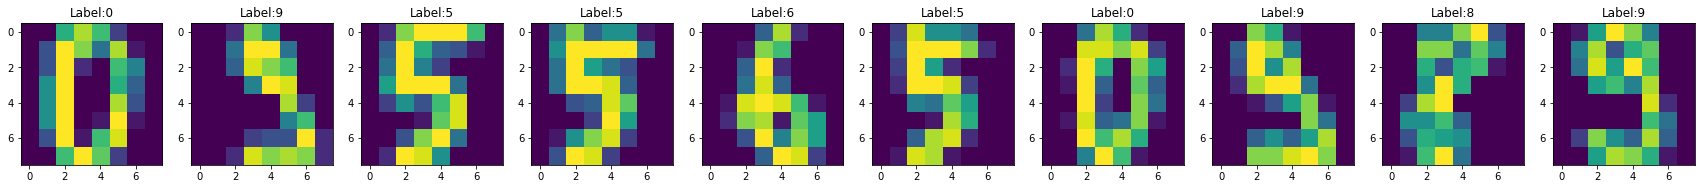

In [ ]:
#Definir tamaño imagenes
plt.figure(figsize=(30,30))
for index, (image,label) in enumerate(numbers_sample):
  digit_reshaped = image.reshape(8,8)
  #Dentro del mismo gráfico crear diferentes mini gráficas
  plt.subplot(1,len(numbers_sample), index+1)
  plt.imshow(digit_reshaped)
  #Titulo a la gráfica
  #string formateado
  plt.title(f'Label:{label}')


## Fase de entrenamiento



### 1. Dividiendo nuestro set de datos en entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
print("Len train: ",len(x_train))
print("Len test: ",len(x_test))

Len train:  1437
Len test:  360


### 2. Importando nuestro modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

### 3. Creando la instancia de nuestro modelo

Creamos nuestro pipeline de entrenamiento. En modelos complicados (regresión logística o redes neuronales) se deben estandarizar los datos para que sean más eficientes y rápidos

Un pipeline es la forma en que tratamos nuestros datos para poder ser entrenados

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Todos los datos que entren antes de la regresión, primero aplicar escalamiento
#Escalamos nuestros datos y luego hacemos el entrenamiento
pipe = make_pipeline(StandardScaler(), LogisticRegression())

### 4. Entrenando nuestro modelo 



Estandariza nuestros datos y después entrena el modelo

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Evaluando nuestro modelo

La regresión logística con Scikit-Learn usa por defecto la precisión como métrica de evaluación del modelo. La presición se define como: 

$${\text{Precisión}=\frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}}$$

In [ ]:
x_test

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ..., 10.,  0.,  0.],
       [ 0.,  0.,  7., ..., 16.,  4.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.]])

In [ ]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [ ]:
score = pipe.score(x_test, y_test)
score

0.9722222222222222

## Haciendo una predicción con nuestro modelo

In [ ]:
#Prueba
guinea_pig = x_test[0]
pipe.predict(guinea_pig.reshape(1,-1))

array([6])

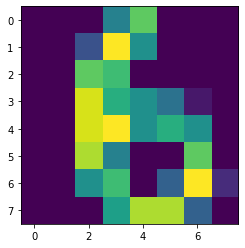

In [ ]:
#Comprobación
plt.imshow(guinea_pig.reshape(8,8))

In [ ]:
#Predicciones a manera global
predictions = pipe.predict(x_test)
predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

## Creando y graficando una matriz de confusión 

Una matriz de confusión es una forma de visualizar el desempeño de nuestro algoritmo comparando el valor actual de la etiqueta vs el de la predicción realizada por el modelo.

In [ ]:
from sklearn import metrics
#Creacion matriz de confusion
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

Text(60.0, 0.5, 'Valor actual')

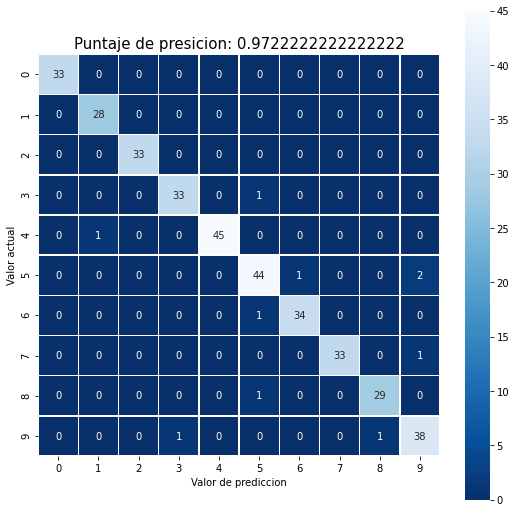

In [ ]:
#Mapa de calor con seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.title(f'Puntaje de presicion: {score}', fontsize=15)
plt.xlabel('Valor de prediccion')
plt.ylabel('Valor actual')